**Entrada:** Un grafo dirigido de la forma $G = (V,E)$, un vértice fuente $e\in V$ y un valor real asociado a cada arco $e \in E$

**Salida:** Una de las siguientes alternativas:
- La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
- Una declaración indicando que $G$ contiene un ciclo negativo.

# 1. Descripción del problema

El problema del camino más corto consiste en encontrar un camino entre dos nodos o vértces, de manera que el peso de sus aristas sea el menor posible. Este problema es muy importe y es aplicado de distintas formas en diversas actividades. Aparte de simplemente obtener el camino o ruta más óptimo, también se puede utilizar para representar cambios de energía en partículas en la rama de la química, para modelar ganacias en la bolsa de valores o bien para redes de software.

# 2. Descripción del algoritmo

Debemos tener en cuenta de que existen diversos algoritmos para modeler el problema del camino más corto, algunos pueden considerar valores o pesos negativos para los arcos del grafo. Nos enfocaremos en dos algoritmos, el primero es Bellman-Ford que nos permite utilizar pesos negativos en los arcos y señalar cuando hay un ciclo negativo, y Dijkstra que solo permite pesos positivos.


**Dijkstra:** El algoritmo recibe un grafo y un nodo fuente. Primero inicializamos los valores de los vertices con infinito positivo y el del nodo fuente con 0, esto es para poder realizar las comparaciones iniciales correctamente. Se toman los pesos de los arcos adyacentes del nodo fuente y se elige el que nos de el menor resultado al sumar la distancia del nodo (en este caso 0) y el peso del arco. Luego agregamos el resultado al nodo destino, este valor representa la distancia que hay entre este y le nodo fuente. Continuamos el procedimiento con cada uno de los nodos.

Ejemplo:


Se inicializan los valores y luego se escoge el camino que tenga la suma menor de distancia al nodo destino.

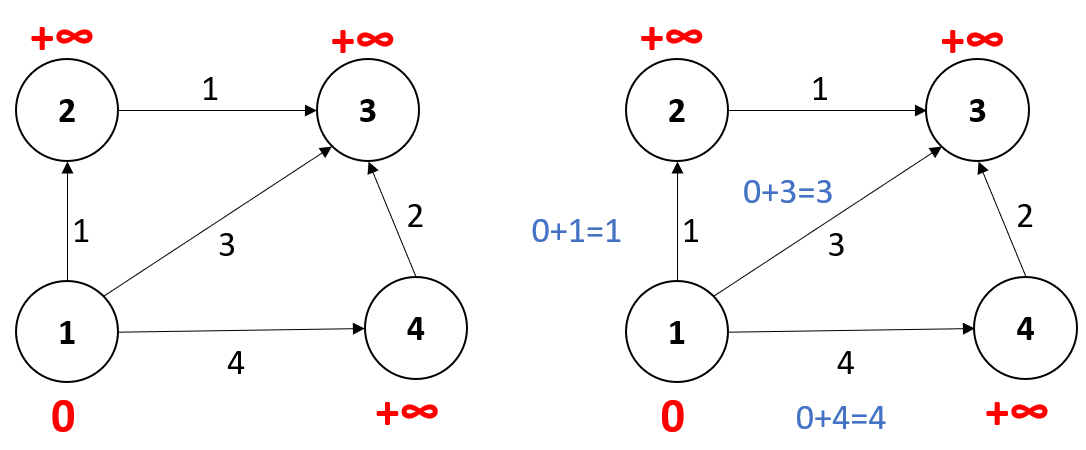

Se sigue con los demás nodos.

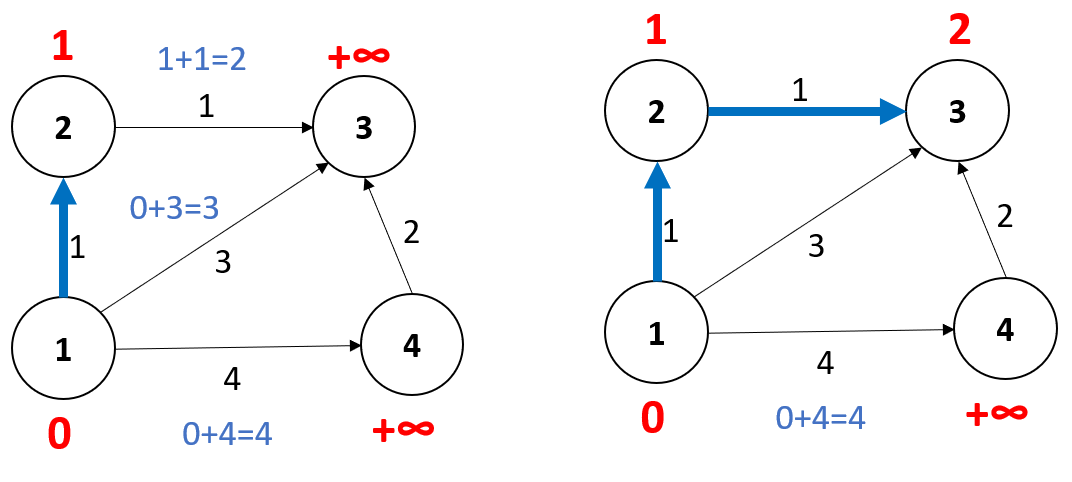

Finalmente nos queda:

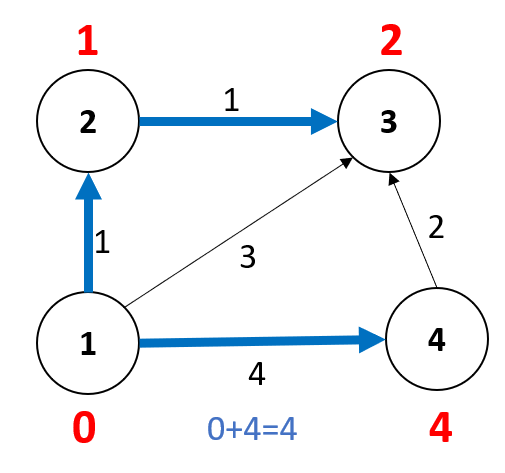

Los distancia más corta para cada vértice es:
1:0 ; 2:1 ; 3:2 ; 4:4


**Bellman-Ford:** Para poder entender este algoritmo se debe tener presente cuál essu subestructurma máxima, por lo que hacemos el siguiente análisis:

Intuitivamente podríamos suponer que la ruta más corta $P$ se puede calcular obteniendo los caminos más cortos $P’$, sin embargo, hay que tomar en cuenta de que en esos subproblemas $P’$ podríamos obtener un camino incluso mas largo que $P$. Lo que sabemos con seguridad es que $P’$ contiene menos arcos que $P$. Con ello, podemos llegar a la siguiente idea: Podemos incluir algún tipo de contador que se encargue de restringir por así decirlo el número de arcos permitidos en un determinado camino. De esta manera un camino ya puede aproximarse a la solución de algún subproblema más pequeño.

**Subestructura óptima:**

Con ello en mente podemos establecer la solución optima del problema mediante las soluciones optimas de los subproblemas. 

El primer caso corresponde a si $P$ tiene $i – 1$ arcos o menos. El camino $P$ puede ser la solución óptima de este subproblema.

El segundo caso es que $P$ contenga $i$ arcos. Sea $L$ la longitud de $P$, y $P’$ el camino formado por los primeros $i - 1$ arcos de $P$, junto con la distancia entre $w$ y $v$ (Siendo $w$ un nodo intermedio y $v$ el nodo final). $P’$ tiene a lo más $i - 1$ arcos y una longitud establecida de $L - lwv$.

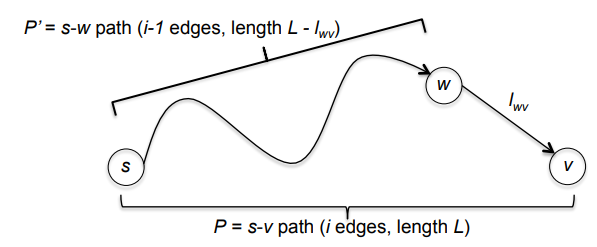 

Con ambos casos podemos declarar un lema para la subestructura óptima, en el que $P$ es el camino mas corto de la forma $s-v$ con a lo más $i$ arcos o menos. Entonces $P$ puede ser el camino más corto de la forma $s-v$ con a lo más $i - 1$ arcos, o bien $P$ es el camino más corto $s-w$ con $i - 1$ arcos junto con la distancia entre $w$ y $v$.

Con ello podemos formar la siguiente ecuación de recurrencia:

$
L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(case 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(case 2)}
    	\end{array}
\right\}$

Ahora podemos describir en si mismo el algoritmo.


Bellman-Ford recibe un grafo y un nodo fuente. Primero inicializamos los valores de los vertices con infinito positivo y el del nodo fuente con 0. Luego se realizan iteraciones o "saltos" en los que encarga de obtener el menor resultado al sumar la distancia del nodo y el peso del arco. Por ejemplo primero toma el camino que llega al nodo destrino que esta a una distacia de un "salto" y se asigna el valor a su nodo. Luego en la siguiente iteración se vuelve a hacer pero con dos saltos, actualizando la distancia de cada nodo si es menor que su antiguo valor. Una vez terminada las iteraciones se comprueba de que no hayan ciclos negativos. En caso de que haya alguno se muestra un mensajo señalando que el grafo posee algún ciclo negativo. 

Ejemplo:

Dado el siguiente grafo primero lo inicializamos con valores infinitos y con 0 el nodo inicial o fuente. En este caso el nodo 1.

Luego analizamos los arcos adyacentes del nodo 1 y le agregamos el valor del peso correspondiente a los nodos destino.

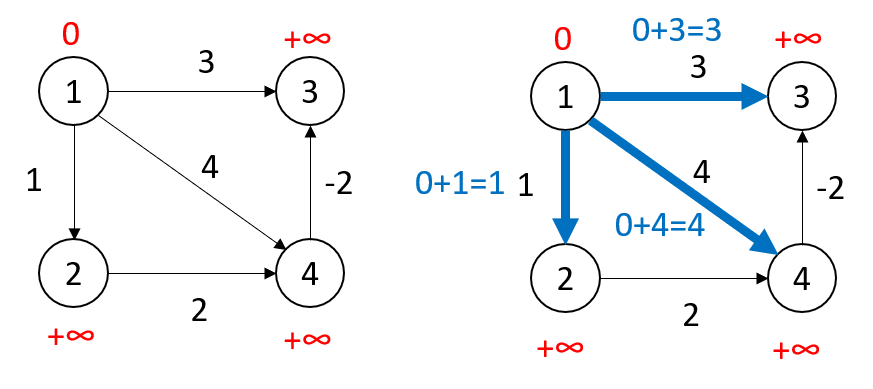

Seguimos ahora con dos "saltos", nos queda de la siguiente manera:

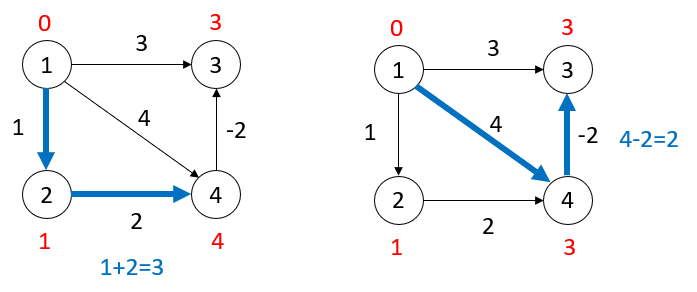

Finalmente nos queda:

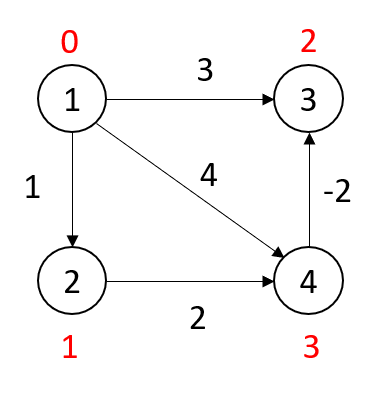

La distancia más corta para cada vértice siendo 1 el nodo fuente es
1:0 ; 2:1 ; 3:2 ; 4:3

# 3. Código

## 3.1 Generador de instancias y mostrar nodos

In [314]:
from collections import defaultdict
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx
import math
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]



def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

def mostrar(T):
  # Guardamos en un diccionario (labels) las etiquetas de cada nodo
  labels={}
  for n in T:
    if "label" in T.nodes[n]: labels[n]=T.nodes[n]["label"]
  # Cambiamos la etiqueta de los nodos
  T_labeled = nx.relabel_nodes(T, labels, copy=True)

  # calcula las posiciones de los nodos
  pos = graphviz_layout(T_labeled, prog="dot")

  # para mostrar los arcos con sus etiquetas
  labels = nx.get_edge_attributes(T,'weight')
  nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=10)

  # Dibujamos los nodos con sus nuevas etiquetas (etiquetas representan postorden)
  nx.draw(T_labeled, pos, with_labels=True, node_size=800, font_color="black", font_size=13, width =1.0)
  nodes = nx.draw_networkx_nodes(T_labeled, pos,  node_size=800, node_color="white")
  nodes.set_edgecolor('black')

## 3.2 Algoritmo Bellman-Ford

In [353]:
from termcolor import colored, cprint

def Bellman_Ford(G,s,n,verbose,exp):
  #Inicializar nodos con infinito
  dist = [float("inf")] * n
  #Marcar el nodo de inicio con 0
  dist[s] = 0

  if verbose == True:
    print("Nodos inicializados:",dist)
    print("Nodos Inicial:",s)
  #Recorrere vértices
  for i in range(0,n):
    if verbose == True:
      print("-------------------")
      cprint(f"[Vértice {i}]")
    #Recorrer arcos de cada vértice
    for j in range(len(G)):
        if verbose == True:
          print(f"\nArco {j}:")
        #Distancia temporal
        tempDistancia = dist[G[j][0]] + G[j][2]
        if verbose == True:
          print(f"Distancia Temporal Obtenida: {tempDistancia}")
          aux = dist[G[j][1]]
          print(f"Distancia anterior:{aux}")
          print(f"{tempDistancia} < {dist[G[j][1]]}?")
        if tempDistancia < dist[G[j][1]]:
          
          if verbose == True:
            print(f"[Se actualiza]")
            print(f"Distancia nueva:{tempDistancia}")
          dist[G[j][1]] = tempDistancia

  #Buscar un ciclo negativo
  for i in range (len(G)):
    if dist[G[i][0]] + G[i][2] < dist[G[i][1]]:
      if exp == False:
        print("[Ciclo negativo]")
      return None,None
  return dist

def mostrarDistancias(G,k,dist,di_g,verbose,visualize):
  if verbose == False:
    print(f"Nodo inicial: {k}")
  print("\n")
  for i in range(len(dist)):
    print(f"Nodo {k} a {i} = {dist[i]}")

  if visualize==True:
    mostrar(di_g)

#Generar y mostrar grafo
n = 3
g,av = instance_generator(n)
di_g = graph_to_nxdigraph(g,n)

#Algoritmo
dist = Bellman_Ford(g,av,n,verbose=False,exp=False)
mostrarDistancias(g,av,dist,di_g,verbose=False,visualize=False)



Nodo inicial: 1


Nodo 1 a 0 = 105
Nodo 1 a 1 = 0
Nodo 1 a 2 = 73


## 3.3 verbose == `True`

In [354]:
#Algoritmo
dist = Bellman_Ford(g,av,n,verbose=True,exp=False)
mostrarDistancias(g,av,dist,di_g,verbose=True,visualize=False)

Nodos inicializados: [inf, 0, inf]
Nodos Inicial: 1
-------------------
[Vértice 0]

Arco 0:
Distancia Temporal Obtenida: 73
Distancia anterior:inf
73 < inf?
[Se actualiza]
Distancia nueva:73

Arco 1:
Distancia Temporal Obtenida: 105
Distancia anterior:inf
105 < inf?
[Se actualiza]
Distancia nueva:105

Arco 2:
Distancia Temporal Obtenida: 113
Distancia anterior:0
113 < 0?
-------------------
[Vértice 1]

Arco 0:
Distancia Temporal Obtenida: 73
Distancia anterior:73
73 < 73?

Arco 1:
Distancia Temporal Obtenida: 105
Distancia anterior:105
105 < 105?

Arco 2:
Distancia Temporal Obtenida: 113
Distancia anterior:0
113 < 0?
-------------------
[Vértice 2]

Arco 0:
Distancia Temporal Obtenida: 73
Distancia anterior:73
73 < 73?

Arco 1:
Distancia Temporal Obtenida: 105
Distancia anterior:105
105 < 105?

Arco 2:
Distancia Temporal Obtenida: 113
Distancia anterior:0
113 < 0?


Nodo 1 a 0 = 105
Nodo 1 a 1 = 0
Nodo 1 a 2 = 73


## 3.4 visualize == `True`



Nodo 1 a 0 = 105
Nodo 1 a 1 = 0
Nodo 1 a 2 = 73


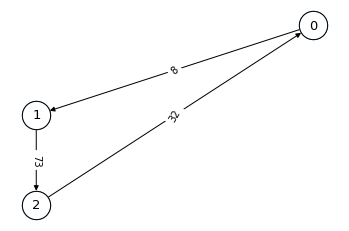

In [355]:
mostrarDistancias(g,av,dist,di_g,verbose=True,visualize=True)

# 4. Correctitud Bellman-Ford

Para probar la correctitud del algoritmo de Bellman-Ford utilizaremos inducción, además de utilizar la subestructura óptima para fundamentar y respaldar nuestras afirmaciones.

Primero que nada, hay que preguntarse: ¿Es posible encontrar la ruta más corta en un grafo con arcos negativos?, en base a esto daremos la siguiente hipótesis:

$Hipótesis:$ *Si somos capaces de encontrar una ruta óptima aplicando programación dinámica entonces es posible encontrar el **camino más corto** pasando por todos los nodos del grafo.*

Dado que dimos una posible respuesta a la incógnita establecida, estableceremos un **teorema**.

$Teorema:$ *Cualquier grafo sin ciclos negativos, tiene un camino mínimo de un nodo fuente $s$ a cada nodo de un grafo $G = (V,E)$.*

En base al teorema, se plantea el siguiente lema que ayudará a explicar la correctitud del algoritmo.

$Lema$

Para $k$ iteraciones en un ciclo con un nodo fuente $s$ en un grafo $G$, podemos decir en el algoritmo:

* Si la distancia de un nodo $u$ no es infinito (hay ruta), entonces es igual a la distancia de un camino de $s$ a $u$, puesto que es posible calcular dicho camino.

Al no tener este punto, no podríamos establecer el siguiente, puesto que al no existir camino, no es posible decir que hay un camino más corto entre nodos, en base a esta afirmación, podemos decir lo siguiente:

* Si hay al menos $k$ aristas para un camino de $s$ a $u$, entonces la distancia en $u$ tiene como máximo la suma de las distancias para $k$ aristas para el camino más corto.

###Prueba del teorema

Ahora que se postuló que un grafo tiene un camino más corto al no poseer ciclos negativos, podemos decir porque el algoritmo resuelve el problema y cual es la lógica que sigue, para ello debemos tener en claro la subestructura optima.

En base a un grafo $G=(V,E)$, con vértice o nodo fuente $s$, podemos afirmar lo siguiente:

Sea $P(1)$ un caso base, para el nodo fuente $s$ y un nodo arbitrario $w$, tenemos que antes de iterar:

* La distancia del nodo $s$ a si mismo es 0, por ende, la hipótesis es verdadera para este caso.

* La distancia del nodo $s$ a un nodo arbitrario $w$ es infinito, lo que significa que no posee conexión con el nodo fuente $s$, lo cual también cumple con la hipótesis.

Estos son los casos base establecidos en la subestructura óptima, los cuales sirven para mostrar por inducción porque el algoritmo es correcto.

Para $P(m)$ pasos con $m < n - 1$ el paso inductivo y $n$ el número de nodos en $m$ iteraciones, para encontrar el camino más corto, el algoritmo realiza el siguiente análisis:

1. Si en cada iteración decimos que la distancia $l_{m-1}$ del vértice fuente $s$ a un nodo arbitrario $w$ se forma por $m-1$ arcos, entonces significa que no hay más rutas óptimas a encontrar, debido a que es ella misma, entonces se mantiene el valor.

2. Si no se da el caso anterior, significa que la distancia $l_m$ óptima se puede componer del valor $l_{m-1}$ con $m-1$ arcos (una ruta óptima que va de $s$ a $w$) más la distancia a encontrar $l_{w-(m-1)}$ que va desde $w$ hasta el nodo $v$.

También debemos considerar que al momento de hacer la primera relajación el algoritmo busca la distancia miníma en el grafo, si en otra parte del código realizamos otra relajación y el algoritmo puede volver a disminuir la distancia de un nodo a otro, significa que encontro un ciclo negativo, por ello, el algoritmo sabe tratar estos casos. 

Finalmente, podemos decir que, mediante inducción, pudimos establecer que para cada iteración en un grafo $G$ el algoritmo encuentra una ruta óptima a cada nodo, esto se logró haciendo un análisis de la subestructura óptima, por ello, podemos afirmar que el algoritmo de Bellman-Ford es correcto.

# 5. Tiempo de ejecución:

Analizando cada paso del algoritmo:

- En el primer paso se crea un arreglo de distancias y otro de predecesores. Para el arreglo de distancias se debe asignar un valor inicial que indica el caso base del algoritmo. Este paso requiere $V$ pasos ($V$ = cantidad de nodos en el grafo), por lo que tiene una complejidad temporal de $O(V)$.

- Luego se inicia un ciclo que debe recorrer los nodos del grafo ($V$ pasos), y a su vez, se inicia un ciclo anidado que recorre todos los arcos del vértice actual ($E$ pasos, $E$ = cantidad de arcos en el grafo). Dentro de este último ciclo, se realiza un proceso para obtener una distancia mínima utilizando la subestructura óptima, pero como todas las operaciones del procedimiento son de complejidad $O(1)$, entonces la complejidad temporal de este paso se reduce a $O(V*E)$, 

- El tercer y último paso del algoritmo recorre una vez más los arcos del grafo ($E$ pasos), para realizar un proceso de verificación que se asegure que no hayan ciclos negativos en el arco. El procedimiento anteriormente mencionado es de complejidad constante $O(1)$, por lo que este paso tendrá una complejidad de $O(E)$.

Teniendo analizados los pasos de este algoritmo, se obtiene una fórmula final para sacar el tiempo de ejecución. Esta sería:

$T(n) = O(V) + O(V*E) + O(E) = O(V*E)$.

Se concluye que Bellman-Ford posee un tiempo de ejecución de $O(V*E)$.

# 6. Experimento

En el siguiente experimento generaremos 25 diferentes instancias para cada $n$ de entrada para el algoritmo Bellman-Ford, junto con la media de tiempo que demoran. Consideraremos un tamaño del problema $n$ entre 3 y 100  

In [361]:
def funcionEspecial(n):
  g,av = instance_generator(n)
  dist = Bellman_Ford(g,av,n,verbose=False,exp=True)

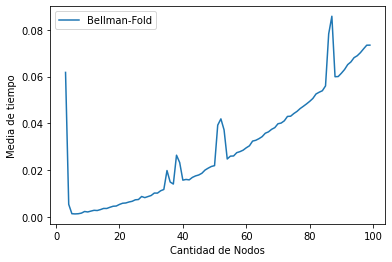

In [421]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

x=[]; y=[]
for n in range(3,100):
  z = repeat(setup="from __main__ import funcionEspecial", stmt=f"funcionEspecial({n})", repeat=25, number=10)
  sum = 0
  for i in range(len(z)):
    sum += z[i]
  prom = sum/25
  x.append(n)
  y.append(prom)

plt.plot(x,y)
plt.legend(["Bellman-Fold"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Media de tiempo')
plt.show()